In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# Lecture de la base de données

# Construire le chemin d'accès au dataset
script_dir = os.path.abspath('')
relative_path = 'dataset/regularite-mensuelle-tgv-aqst.csv'
csv_path = os.path.join(script_dir, relative_path)

# Chargez le fichier CSV
data = pd.read_csv(csv_path, delimiter=";")
print(data.head())

      date   service         gare_depart         gare_arrivee  duree_moyenne  \
0  2018-01  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE            141   
1  2018-01  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE            165   
2  2018-01  National  PARIS MONTPARNASSE              QUIMPER            220   
3  2018-01  National  PARIS MONTPARNASSE              ST MALO            156   
4  2018-01  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS             61   

   nb_train_prevu  nb_annulation  commentaire_annulation  \
0             870              5                     NaN   
1             222              0                     NaN   
2             248              1                     NaN   
3             102              0                     NaN   
4             391              2                     NaN   

   nb_train_depart_retard  retard_moyen_depart  ...  nb_train_retard_sup_15  \
0                     289            11.247809  ...                     110   


In [4]:
#Info sur les types des données du dataset (float, int, object)
print(data.dtypes)

date                                     object
service                                  object
gare_depart                              object
gare_arrivee                             object
duree_moyenne                             int64
nb_train_prevu                            int64
nb_annulation                             int64
commentaire_annulation                  float64
nb_train_depart_retard                    int64
retard_moyen_depart                     float64
retard_moyen_tous_trains_depart         float64
commentaire_retards_depart              float64
nb_train_retard_arrivee                   int64
retard_moyen_arrivee                    float64
retard_moyen_tous_trains_arrivee        float64
commentaires_retard_arrivee              object
nb_train_retard_sup_15                    int64
retard_moyen_trains_retard_sup15        float64
nb_train_retard_sup_30                    int64
nb_train_retard_sup_60                    int64
prct_cause_externe                      

In [5]:
#Info sur chaque colonne du dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [6]:
#On convertit la colonne 'date' du DataFrame en un format de date spécifique (année-mois)
#en utilisant la fonction pd.to_datetime, et on crée une nouvelle colonne "année" pour faciliter le split
data['date'] = pd.to_datetime(data['date'])
data['annee'] = data['date'].dt.year
data['my']=data['date'].dt.to_period('M')
data



,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,annee,my
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,2018,2018-01
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,2018,2018-01
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,2018,2018-01
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,2018,2018-01
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,2018,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06-01,National,STRASBOURG,PARIS EST,114,492,2,NaN,273,11.989927,...,31,10,7.619048,5.714286,55.238095,18.095238,7.619048,5.714286,2023,2023-06
8150,2023-06-01,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,NaN,24,28.730556,...,24,10,13.888889,33.333333,8.333333,19.444444,8.333333,16.666667,2023,2023-06
8151,2023-06-01,National,TOURS,PARIS MONTPARNASSE,78,192,1,NaN,20,31.281667,...,7,5,14.285714,21.428571,28.571429,21.428571,3.571429,10.714286,2023,2023-06
8152,2023-06-01,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,NaN,347,13.517051,...,62,22,26.724138,19.827586,27.586207,7.758621,7.758621,10.344828,2023,2023-06


In [7]:
#Infos sur le nombre de valeurs nulles (manquantes) dans le dataset
print(data.isnull().sum())

date                                       0
service                                    0
gare_depart                                0
gare_arrivee                               0
duree_moyenne                              0
nb_train_prevu                             0
nb_annulation                              0
commentaire_annulation                  8154
nb_train_depart_retard                     0
retard_moyen_depart                        0
retard_moyen_tous_trains_depart            0
commentaire_retards_depart              8154
nb_train_retard_arrivee                    0
retard_moyen_arrivee                       0
retard_moyen_tous_trains_arrivee           0
commentaires_retard_arrivee             7456
nb_train_retard_sup_15                     0
retard_moyen_trains_retard_sup15           0
nb_train_retard_sup_30                     0
nb_train_retard_sup_60                     0
prct_cause_externe                         0
prct_cause_infra                           0
prct_cause

In [8]:
columns_to_drop = ['commentaire_annulation', 'commentaire_retards_depart', 'commentaires_retard_arrivee']
data = data.drop(columns=columns_to_drop, axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  8154 non-null   datetime64[ns]
 1   service                               8154 non-null   object        
 2   gare_depart                           8154 non-null   object        
 3   gare_arrivee                          8154 non-null   object        
 4   duree_moyenne                         8154 non-null   int64         
 5   nb_train_prevu                        8154 non-null   int64         
 6   nb_annulation                         8154 non-null   int64         
 7   nb_train_depart_retard                8154 non-null   int64         
 8   retard_moyen_depart                   8154 non-null   float64       
 9   retard_moyen_tous_trains_depart       8154 non-null   float64       
 10  

<h3><strong>Analyse des données :</strong></h3><p>

Une petite visualisation de la distribution des services "national" et "international" dans notre dataset.

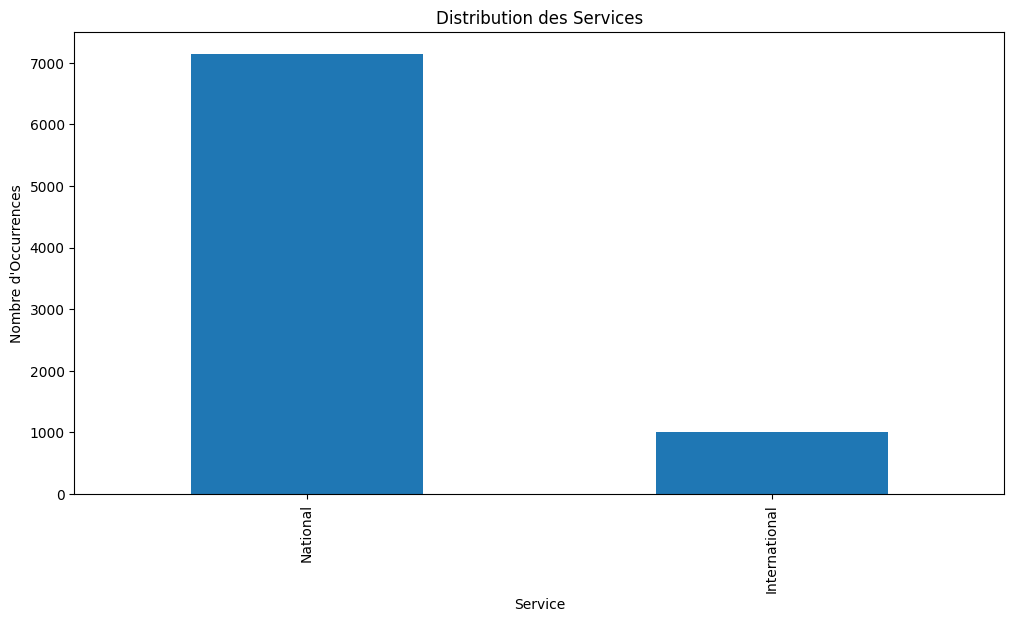

In [9]:
service_counts = data['service'].value_counts()
plt.figure(figsize=(12, 6))
service_counts.plot(kind='bar')
plt.xlabel("Service")
plt.ylabel("Nombre d'Occurrences")
plt.title("Distribution des Services")
plt.show()

Tendances temporelles : Étant donné que nous disposons de données mensuelles, il est utile de vérifier s'il existe une saisonnalité ou des tendances dans les délais et les causes des retards au fil du temps.

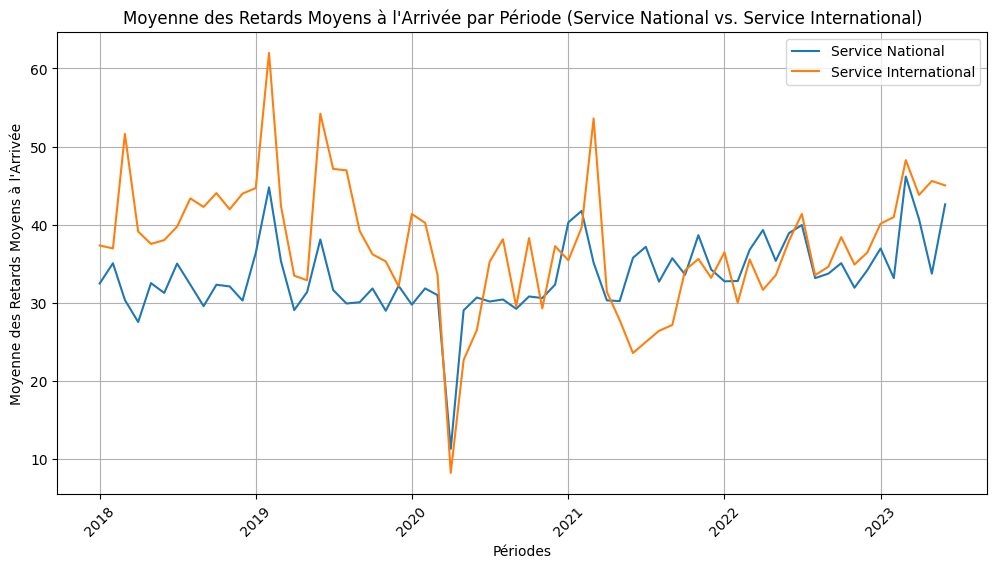

In [10]:

data['my'] = data['my'].dt.to_timestamp()

# Séparez les données en fonction du service
service_national = data[data['service'] == 'National']
service_international = data[data['service'] == 'International']

# Calculez les moyennes des retards pour chaque service
moyennes_retard_national = service_national.groupby('my')['retard_moyen_arrivee'].mean()
moyennes_retard_international = service_international.groupby('my')['retard_moyen_arrivee'].mean()

# Créez un graphique pour afficher les deux courbes
plt.figure(figsize=(12, 6))
plt.plot(moyennes_retard_national.index, moyennes_retard_national.values, label='Service National')
plt.plot(moyennes_retard_international.index, moyennes_retard_international.values, label='Service International')
plt.xlabel("Périodes")
plt.ylabel("Moyenne des Retards Moyens à l'Arrivée")
plt.title("Moyenne des Retards Moyens à l'Arrivée par Période (Service National vs. Service International)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des abscisses pour une meilleure lisibilité
plt.legend()

plt.show()

Le graphique montre la moyenne des retards moyens à l'arrivée dans le temps. Les données semblent présenter une certaine saisonnalité, avec des pics et des creux à intervalles réguliers. Cela suggère que certains mois ou certaines périodes peuvent présenter des retards plus ou moins importants, ce qui pourrait constituer une information précieuse pour la modélisation. On pourrait alors par la suite penser à un modèle de forecasting en utilisant des "time series".

Ici nous essayons de visualiser la corrélation entre la variable que nous souhaitons prédire 'Target' et les autres variables numériques :

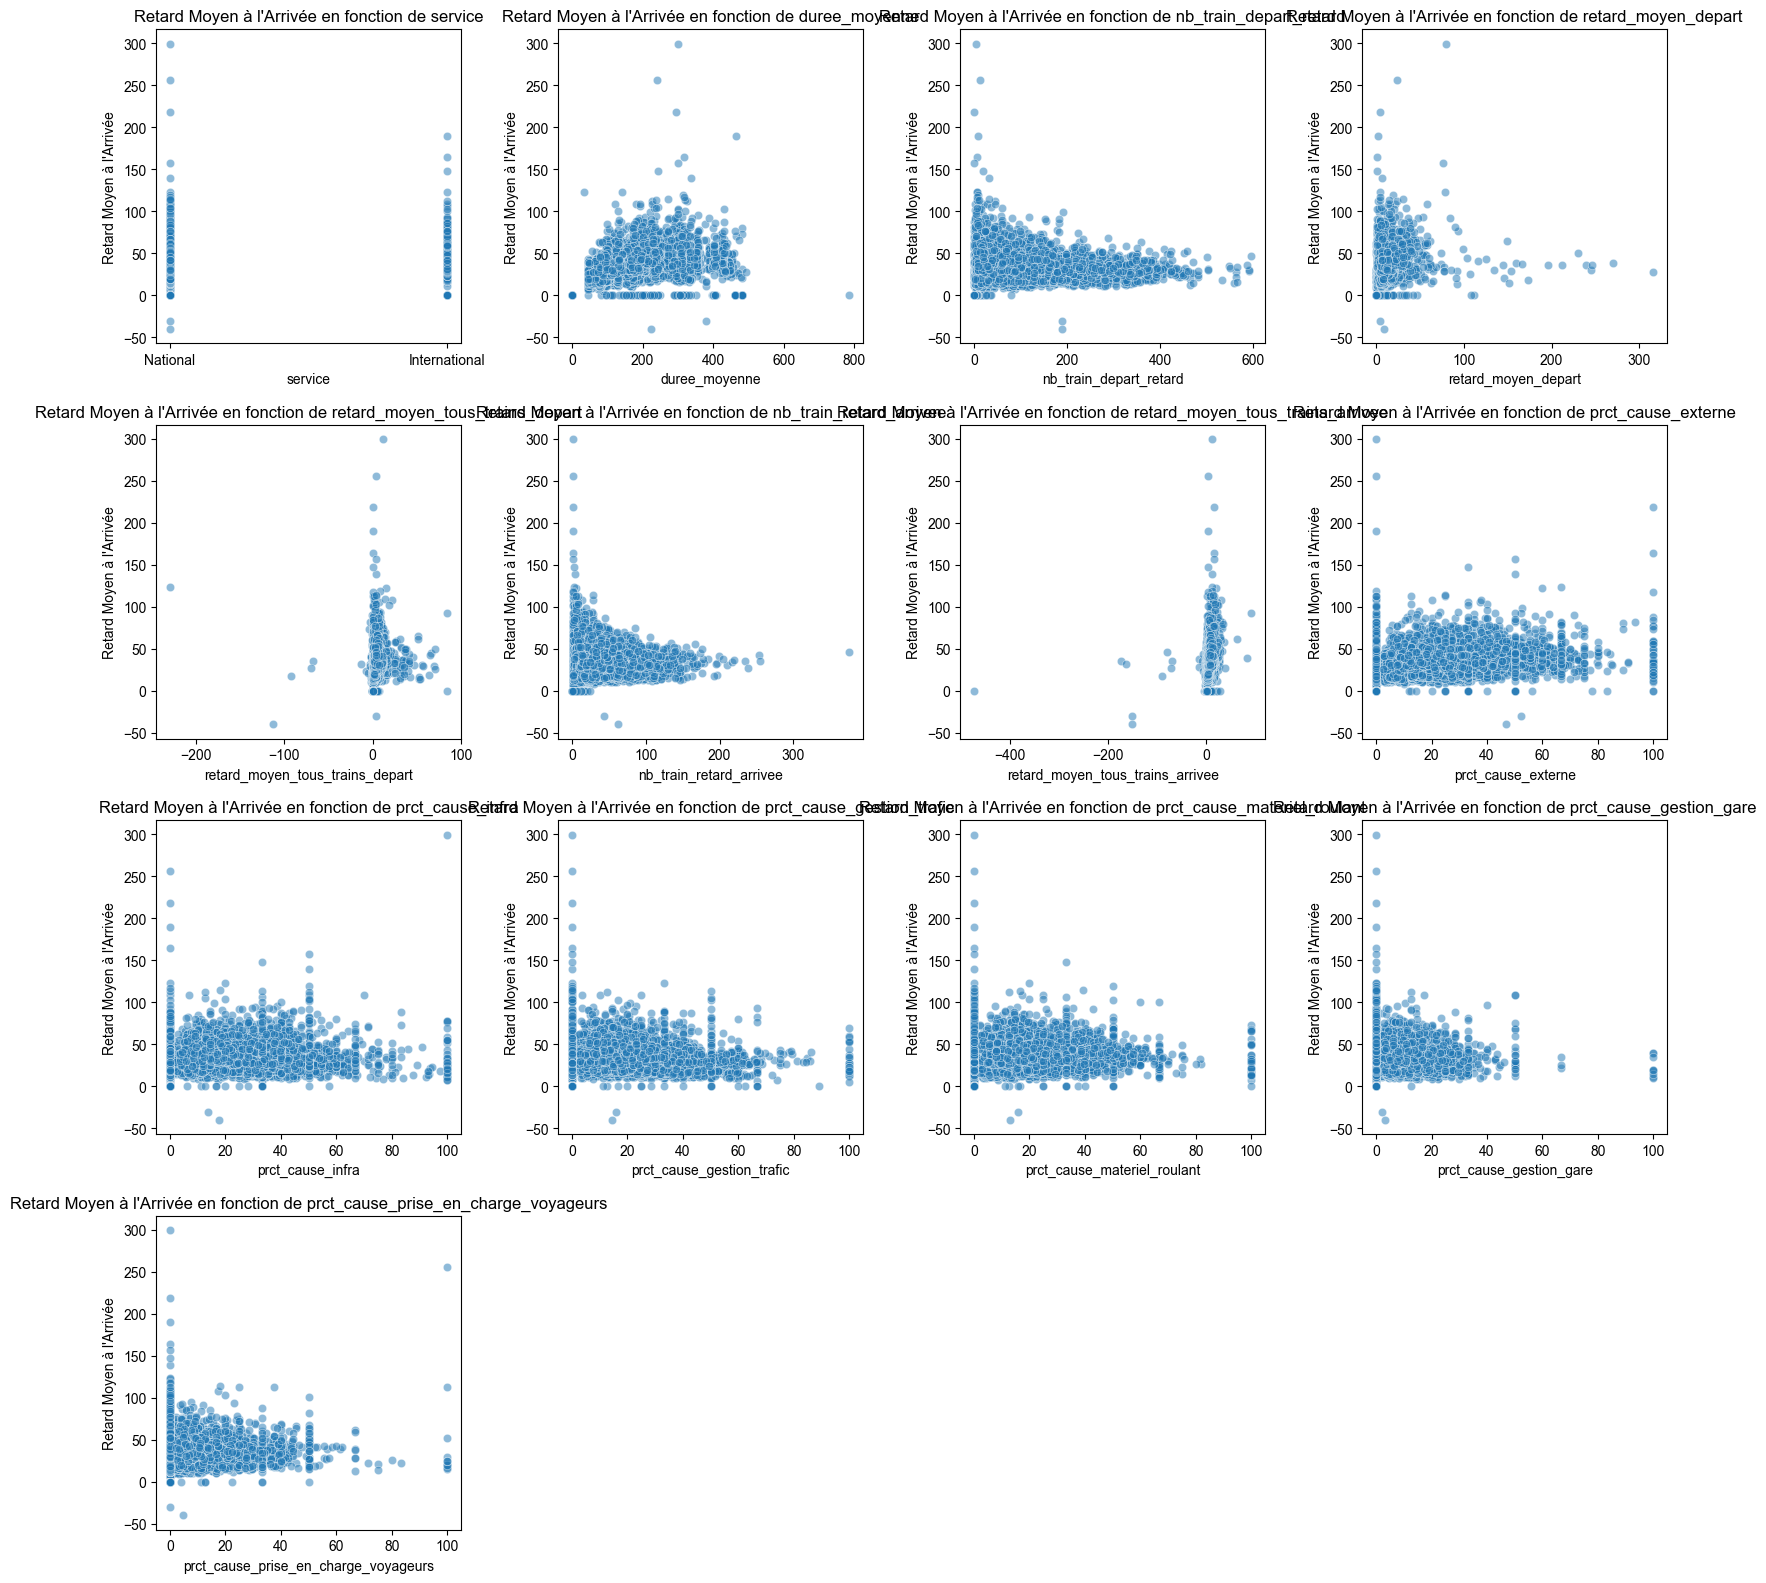

In [11]:

# Sélection des colonnes que nous souhaitons inclure dans la pairplot
variables_a_inclure = ['service', 'duree_moyenne', 
                       'nb_train_depart_retard', 'retard_moyen_depart', 'retard_moyen_tous_trains_depart',
                       'nb_train_retard_arrivee', 'retard_moyen_tous_trains_arrivee','prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
                       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 
                       'prct_cause_prise_en_charge_voyageurs'
                    ]

# Calcul du nombre de lignes et de colonnes nécessaires en fonction du nombre de variables
num_variables = len(variables_a_inclure)
num_rows = int(np.ceil(num_variables / 4))
num_cols = 4

# Création d'une grille de sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Création d'une pairplot avec "retard_moyen_arrivée" en fonction de chaque variable
sns.set(style="ticks")

for i, variable in enumerate(variables_a_inclure):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=data[variable], y=data['retard_moyen_arrivee'], ax=axes[row, col], alpha=0.5)
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel("Retard Moyen à l'Arrivée")
    axes[row, col].set_title(f"Retard Moyen à l'Arrivée en fonction de {variable}")
    
# Suppression des sous-graphiques non utilisés
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

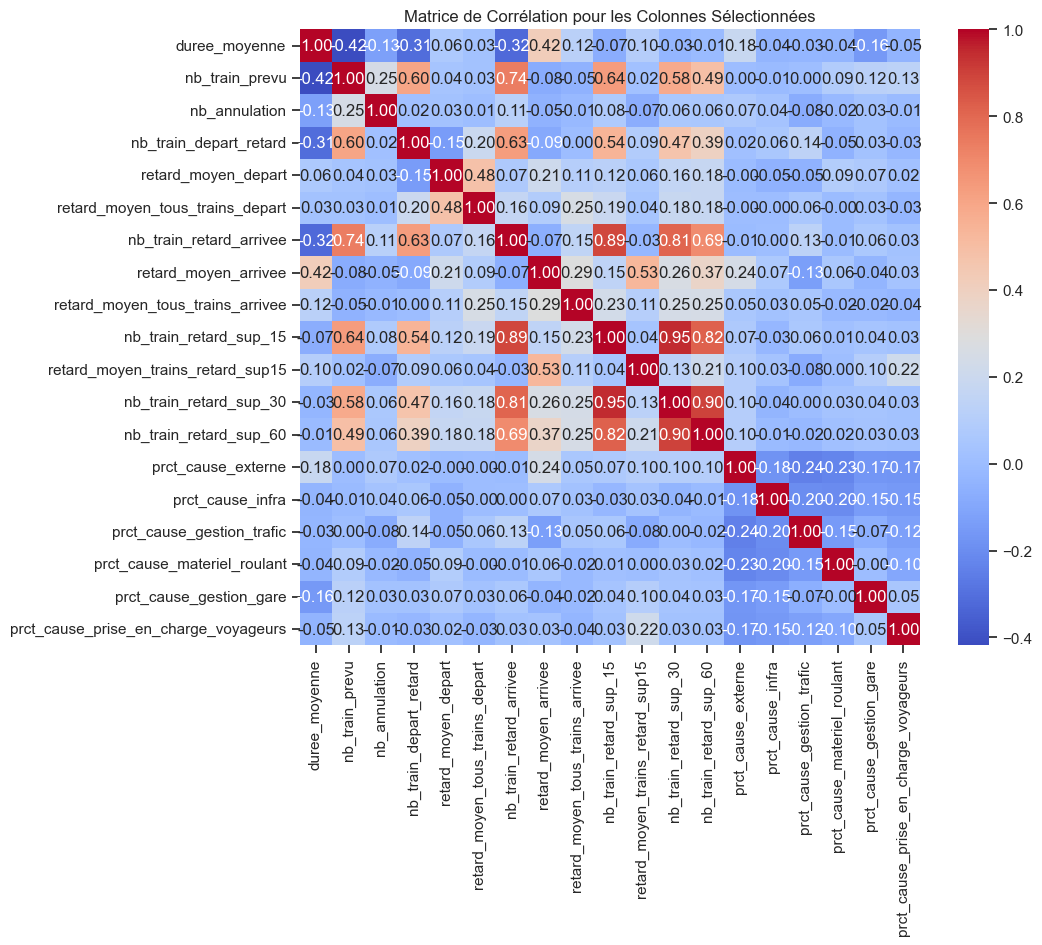

In [12]:
# Sélection des colonnes spécifiques pour lesquelles nous souhaitons créer la matrice de corrélation
selected_columns = ['duree_moyenne', 'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard', 'retard_moyen_depart', 'retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee', 'retard_moyen_arrivee', 'retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15', 'nb_train_retard_sup_30', 'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs',
]

# Création d'un sous-DataFrame avec les colonnes sélectionnées
subset_data = data[selected_columns]

# Calcule de la matrice de corrélation pour le sous-DataFrame
correlation_matrix = subset_data.corr()

# Création d'une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation pour les Colonnes Sélectionnées")
plt.show()

<strong>Analyse de corrélation :</strong>

- La variable retard_moyen_trains_retard_sup15 (retard moyen des trains retardés de plus de 15 minutes) présente une corrélation positive élevée avec notre objectif retard_moyen_arrivee. Ceci est normal puisque les trains ayant des retards plus importants augmentent le retard moyen global.
- duree_moyenne (durée moyenne) présente également une corrélation positive avec l'objectif. Les trajets plus longs peuvent avoir plus de chances de subir des retards.
- nb_train_retard_sup_60 (nombre de trains retardés de plus de 60 minutes) est une autre caractéristique positivement corrélée avec le retard moyen.
- Les causes externes (prct_cause_externe) présentent également une corrélation positive, ce qui indique que les facteurs externes peuvent contribuer de manière significative aux retards.
- D'autre part, la gestion du trafic (prct_cause_gestion_trafic) présente une corrélation négative, ce qui suggère que plus le pourcentage de retards dus à la gestion du trafic augmente, plus le retard moyen peut diminuer.
- Les prct_cause_... présentent une corrélation très faible avec toutes les autres variables, ce qui nous donne l'idée qu'une régression pour prédire chaque pourcentage serait aberrante.
\end{itemize}

Quelques suggestions de feature engineering : 

- Caractéristiques temporelles : Extraire le mois ou la saison de la date pour saisir les tendances saisonnières des retards.
- Classement en catégories : Pour les variables continues telles que duree_moyenne, nous pouvons créer des bacs pour les convertir en caractéristiques catégorielles, afin de capturer les relations non linéaires.

In [13]:
# Implementing the suggested feature engineering
# Saisonnalité: Extracting month and year from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month


<strong>Analyse de quelques données catégorielles :</strong>

In [14]:
unique_gares = data['gare_depart'].nunique()
top_gares_counts = data['gare_depart'].value_counts().head(10)
top_gares_delays = data[data['gare_depart'].isin(top_gares_counts.index)].groupby('gare_depart')['retard_moyen_depart'].mean()
print(unique_gares, top_gares_counts,top_gares_delays)

59 gare_depart
PARIS LYON              1649
PARIS MONTPARNASSE      1056
PARIS EST                396
LYON PART DIEU           396
MARSEILLE ST CHARLES     374
PARIS NORD               264
LILLE                    198
NANTES                   144
RENNES                   144
BORDEAUX ST JEAN         142
Name: count, dtype: int64 gare_depart
BORDEAUX ST JEAN        10.910950
LILLE                    8.514280
LYON PART DIEU           9.434431
MARSEILLE ST CHARLES    11.339474
NANTES                  12.457114
PARIS EST               10.285494
PARIS LYON              14.259331
PARIS MONTPARNASSE      11.001482
PARIS NORD              14.404307
RENNES                  11.018185
Name: retard_moyen_depart, dtype: float64


In [15]:
unique_gares_arrivee = data['gare_arrivee'].nunique()
top_gares_arrivee_counts = data['gare_arrivee'].value_counts().head(10)
top_gares_arrivee_delays = data[data['gare_arrivee'].isin(top_gares_arrivee_counts.index)].groupby('gare_arrivee')['retard_moyen_arrivee'].mean()
print(unique_gares_arrivee, top_gares_arrivee_counts,top_gares_arrivee_delays)

59 gare_arrivee
PARIS LYON              1649
PARIS MONTPARNASSE      1056
LYON PART DIEU           396
PARIS EST                396
MARSEILLE ST CHARLES     322
PARIS NORD               264
LILLE                    198
NANTES                   144
RENNES                   144
BORDEAUX ST JEAN         142
Name: count, dtype: int64 gare_arrivee
BORDEAUX ST JEAN        38.071437
LILLE                   32.867062
LYON PART DIEU          36.229408
MARSEILLE ST CHARLES    39.112577
NANTES                  38.672139
PARIS EST               28.278292
PARIS LYON              37.671739
PARIS MONTPARNASSE      29.704919
PARIS NORD              20.744230
RENNES                  35.314719
Name: retard_moyen_arrivee, dtype: float64


In [16]:
# Sélection des colonnes spécifiques pour lesquelles nous souhaitons créer la matrice de corrélation
selected_columns = ['Rapport_retard','Rapport_annulation','my', 'retard_moyen_arrivee'  
]

# Création d'un sous-DataFrame avec les colonnes sélectionnées
subset_data = data[selected_columns]

# Calcule de la matrice de corrélation pour le sous-DataFrame
correlation_matrix = subset_data.corr()

# Création d'une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation pour les Colonnes Sélectionnées")
plt.show()

KeyError: "['Rapport_retard', 'Rapport_annulation'] not in index"

On remarque qu'il n'y a toujours pas de forte corrélation avec la variable cible.

Importation de datasets supplémentaires : 

In [18]:

# Split the data into training and test sets based on the year
train_data = data[data['annee'] < 2023]
test_data = data[data['annee'] == 2023]
# Display the shapes of the training and test data
train_data.shape, test_data.shape



# Identify the features and target variable
features = train_data.columns.difference(['retard_moyen_arrivee', 'date', 'my'])
target = 'retard_moyen_arrivee'

# Display the identified features
features



Index(['annee', 'duree_moyenne', 'gare_arrivee', 'gare_depart', 'month',
       'nb_annulation', 'nb_train_depart_retard', 'nb_train_prevu',
       'nb_train_retard_arrivee', 'nb_train_retard_sup_15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_gestion_gare',
       'prct_cause_gestion_trafic', 'prct_cause_infra',
       'prct_cause_materiel_roulant', 'prct_cause_prise_en_charge_voyageurs',
       'retard_moyen_depart', 'retard_moyen_tous_trains_arrivee',
       'retard_moyen_tous_trains_depart', 'retard_moyen_trains_retard_sup15',
       'service', 'year'],
      dtype='object')

In [19]:
from sklearn.preprocessing import OneHotEncoder


# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)

train_encoded = encoder.fit_transform(train_data[['gare_arrivee', 'gare_depart', 'service']])
test_encoded = encoder.transform(test_data[['gare_arrivee', 'gare_depart', 'service']])

train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['gare_arrivee', 'gare_depart', 'service'])
, index=train_data.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['gare_arrivee', 'gare_depart', 'service'])
, index=test_data.index)

# Drop original categorical columns and concatenate the one-hot encoded columns
train_data = pd.concat([train_data.drop(columns=['gare_arrivee', 'gare_depart', 'service']), train_encoded_df], axis=1)
test_data = pd.concat([test_data.drop(columns=['gare_arrivee', 'gare_depart', 'service']), test_encoded_df], axis=1)

# Update the features list after one-hot encoding
features = train_data.columns.difference(['retard_moyen_arrivee', 'date', 'my'])

features


C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['annee', 'duree_moyenne', 'gare_arrivee_ANGERS SAINT LAUD',
       'gare_arrivee_ANGOULEME', 'gare_arrivee_ANNECY', 'gare_arrivee_ARRAS',
       'gare_arrivee_AVIGNON TGV', 'gare_arrivee_BARCELONA',
       'gare_arrivee_BELLEGARDE (AIN)',
       'gare_arrivee_BESANCON FRANCHE COMTE TGV',
       ...
       'prct_cause_gestion_trafic', 'prct_cause_infra',
       'prct_cause_materiel_roulant', 'prct_cause_prise_en_charge_voyageurs',
       'retard_moyen_depart', 'retard_moyen_tous_trains_arrivee',
       'retard_moyen_tous_trains_depart', 'retard_moyen_trains_retard_sup15',
       'service_National', 'year'],
      dtype='object', length=138)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Prepare the training and test data
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the metrics
    mse= mean_squared_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "MAE": mae, "MSE":mse}

results_df = pd.DataFrame(results).T
results_df


,RMSE,MAE,MSE
Linear Regression,10.608952,6.850955,112.549854
Random Forest,6.381911,2.227104,40.728789
Gradient Boosting,4.125570,2.487789,17.020326
Ridge Regression,10.686042,6.922360,114.191485
Lasso Regression,10.673696,5.823914,113.927789


Le modèle Gradient Boosting semble être le plus convainquant quant à la prédiction du retard moyen à l'arrivée. Mais rappelons que nous avons utilisé toutes les autres "features" pour prédire notre variable "target". Dans un contexte réel, nous ne disposerons pas par exemple des données sur le nombre de retards d'un train en 2024, ou le retard de départ, ou tout autre donnée liée au retard. Il faut alors ajuster ce modèle.

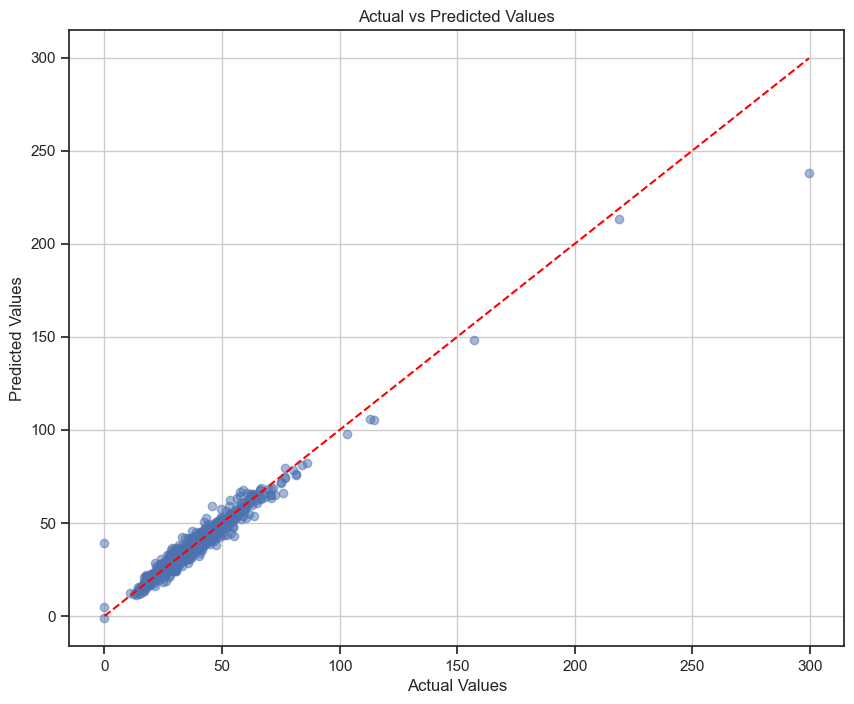

In [21]:
import matplotlib.pyplot as plt

# Use the Gradient Boosting model to make predictions
model = models["Gradient Boosting"]
y_pred = model.predict(test_data[features])

# Plot predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

<h3><strong>Prédiction des causes du retard :</strong></h3><p>

Pour cette première approche nous avons décidé de prédire la cause majoritaire du retard, nous avons alors créer une nouvelle colonne 'major_cause' pour relever la cause majeure pour chaque retard.

In [22]:
# Extract columns representing the percentage of each delay cause
cause_columns = [
    'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic', 
    'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs'
]

# Identify the major cause for each record
data['major_cause'] = data[cause_columns].idxmax(axis=1)

# Display the first few rows to check the created column
data[['major_cause'] + cause_columns].head()


,major_cause,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,prct_cause_externe,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,prct_cause_gestion_trafic,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,prct_cause_infra,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,prct_cause_infra,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,prct_cause_infra,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


On procède de même pour cette classification, on fait un encodage 'one hot' pour les données catégorielles.

In [23]:
from sklearn.preprocessing import OneHotEncoder
train_data_class = data[data['date'].dt.year < 2023]
test_data_class = data[data['date'].dt.year == 2023]

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)

train_encoded = encoder.fit_transform(train_data_class[['gare_arrivee', 'gare_depart', 'service']])
test_encoded = encoder.transform(test_data_class[['gare_arrivee', 'gare_depart', 'service']])

train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['gare_arrivee', 'gare_depart', 'service'])
, index=train_data.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['gare_arrivee', 'gare_depart', 'service'])
, index=test_data.index)

# Drop original categorical columns and concatenate the one-hot encoded columns
train_data_class = pd.concat([train_data_class.drop(columns=['gare_arrivee', 'gare_depart', 'service']), train_encoded_df], axis=1)
test_data_class = pd.concat([test_data_class.drop(columns=['gare_arrivee', 'gare_depart', 'service']), test_encoded_df], axis=1)

# Update the features list after one-hot encoding
features_class = train_data_class.columns.difference(['major_cause', 'date', 'my','year', 'annee']+ cause_columns)

features_class

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['duree_moyenne', 'gare_arrivee_ANGERS SAINT LAUD',
       'gare_arrivee_ANGOULEME', 'gare_arrivee_ANNECY', 'gare_arrivee_ARRAS',
       'gare_arrivee_AVIGNON TGV', 'gare_arrivee_BARCELONA',
       'gare_arrivee_BELLEGARDE (AIN)',
       'gare_arrivee_BESANCON FRANCHE COMTE TGV',
       'gare_arrivee_BORDEAUX ST JEAN',
       ...
       'nb_train_retard_arrivee', 'nb_train_retard_sup_15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'retard_moyen_arrivee', 'retard_moyen_depart',
       'retard_moyen_tous_trains_arrivee', 'retard_moyen_tous_trains_depart',
       'retard_moyen_trains_retard_sup15', 'service_National'],
      dtype='object', length=131)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


# Update train_data and test_data with 'major_cause' column
# Sélectionnez les caractéristiques et la variable cible
X_train_class = train_data_class[features_class]
y_train_class = train_data_class['major_cause']
X_test_class = test_data_class[features_class]
y_test_class = test_data_class['major_cause']
from sklearn.linear_model import LogisticRegression


# Liste des modèles à évaluer
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
}

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    # Calculating and printing the accuracy
    accuracy = accuracy_score(y_test_class, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_class, y_pred))
    print(confusion_matrix(y_test_class, y_pred))
    print("-------------------------------------------------------------")



Evaluating Random Forest...
Accuracy: 0.4187
                                      precision    recall  f1-score   support

                  prct_cause_externe       0.32      0.68      0.44       188
             prct_cause_gestion_gare       0.00      0.00      0.00        10
           prct_cause_gestion_trafic       0.86      0.37      0.52       184
                    prct_cause_infra       0.36      0.22      0.27       175
         prct_cause_materiel_roulant       0.50      0.44      0.47       160
prct_cause_prise_en_charge_voyageurs       0.00      0.00      0.00         9

                            accuracy                           0.42       726
                           macro avg       0.34      0.28      0.28       726
                        weighted avg       0.50      0.42      0.41       726

[[128   0   4  24  31   1]
 [  4   0   0   0   6   0]
 [ 76   0  68  23  16   1]
 [118   0   4  38  15   0]
 [ 66   0   2  22  70   0]
 [  6   0   1   0   2   0]]
---------

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: U

Accuracy: 0.4229
                                      precision    recall  f1-score   support

                  prct_cause_externe       0.34      0.82      0.48       188
             prct_cause_gestion_gare       0.00      0.00      0.00        10
           prct_cause_gestion_trafic       0.82      0.34      0.48       184
                    prct_cause_infra       0.41      0.18      0.25       175
         prct_cause_materiel_roulant       0.54      0.37      0.44       160
prct_cause_prise_en_charge_voyageurs       0.00      0.00      0.00         9

                            accuracy                           0.42       726
                           macro avg       0.35      0.28      0.27       726
                        weighted avg       0.51      0.42      0.40       726

[[154   0   3  12  19   0]
 [  9   0   0   0   1   0]
 [ 82   0  63  25  13   1]
 [124   0   5  31  15   0]
 [ 84   0   6   7  59   4]
 [  6   0   0   1   2   0]]
-------------------------------------

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Update train_data and test_data with 'major_cause' column
# Sélectionnez les caractéristiques et la variable cible
X_train_class = train_data_class[features_class]
y_train_class = train_data_class['major_cause']
X_test_class = test_data_class[features_class]
y_test_class = test_data_class['major_cause']

# Liste des modèles à évaluer
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    # Calculating and printing the accuracy
    accuracy = accuracy_score(y_test_class, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_class, y_pred))
    print(confusion_matrix(y_test_class, y_pred))
    print("-------------------------------------------------------------")


Evaluating Gradient Boosting...
Accuracy: 0.3884
                                      precision    recall  f1-score   support

                  prct_cause_externe       0.32      0.71      0.44       188
             prct_cause_gestion_gare       0.00      0.00      0.00        10
           prct_cause_gestion_trafic       0.79      0.32      0.45       184
                    prct_cause_infra       0.33      0.15      0.20       175
         prct_cause_materiel_roulant       0.44      0.41      0.42       160
prct_cause_prise_en_charge_voyageurs       0.00      0.00      0.00         9

                            accuracy                           0.39       726
                           macro avg       0.31      0.26      0.25       726
                        weighted avg       0.46      0.39      0.37       726

[[133   1   3   8  42   1]
 [  3   0   1   0   6   0]
 [ 75   0  58  29  18   4]
 [125   2   5  26  17   0]
 [ 72   2   5  14  65   2]
 [  5   0   1   2   1   0]]
-----